In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module3/lesson_3_data.csv', encoding='windows-1251')
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [11]:
user_df = df[['tc', 'art_sp']]
user_df = user_df.rename(columns={'tc':'user_id', 'art_sp':'brand_info'})
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [26]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split()[-1])

In [16]:
user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [43]:
user_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name':'count'}) \
    .sort_values('brand_name', ascending=False) \
    .rename(columns={'brand_name':'purchases'}) \
    .query('purchases >= 5')
user_purchases

,user_id,purchases
6326,62325711,60
3376,19317282,55
670,1228091,52
1377,3133061,51
3965,23440561,47
...,...,...
6614,69488341,5
2666,13398901,5
8066,86368591,5
8075,86414371,5


In [44]:
user_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name':pd.Series.nunique}) \
    .rename(columns={'brand_name':'unique_brands'})
user_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [45]:
user_lovely_brand_purchases_df = user_df.groupby(['user_id','brand_name'], as_index=False) \
        .agg({'brand_info': 'count'}) \
        .sort_values(['user_id', 'brand_info'], ascending=[False,False]) \
        .groupby('user_id') \
        .head(1) \
        .rename(columns={'brand_name':'lovely_brand', 'brand_info':'lovely_brand_purchases'})
user_lovely_brand_purchases_df.head()

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [48]:
loyality_df = user_purchases.merge(user_unique_brands, on='user_id') \
    .merge(user_lovely_brand_purchases_df, on='user_id')

In [50]:
loyality_df[loyality_df.unique_brands == 1]

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
1,19317282,55,1,Brand_4,55
23,27291281,36,1,Brand_4,36
53,20835112,27,1,Brand_4,27
78,72232811,25,1,Brand_4,25
86,14469051,24,1,Brand_4,24
...,...,...,...,...,...
3375,1811711,5,1,Brand_4,5
3377,13376972,5,1,Brand_4,5
3379,13398901,5,1,Brand_4,5
3381,86414371,5,1,Brand_4,5


In [51]:
loyality_df['loyality_score'] = loyality_df.lovely_brand_purchases / loyality_df.purchases

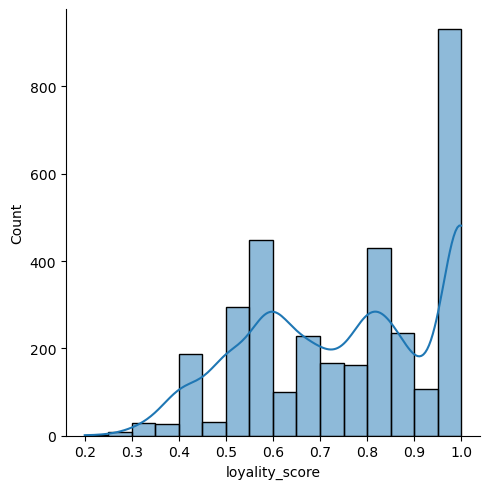

In [58]:
ax = sns.displot(loyality_df.loyality_score, kde=True)

In [61]:
brand_loyality = loyality_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyality_score':'median', 'user_id':'count'})
brand_loyality.head()

,lovely_brand,loyality_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5


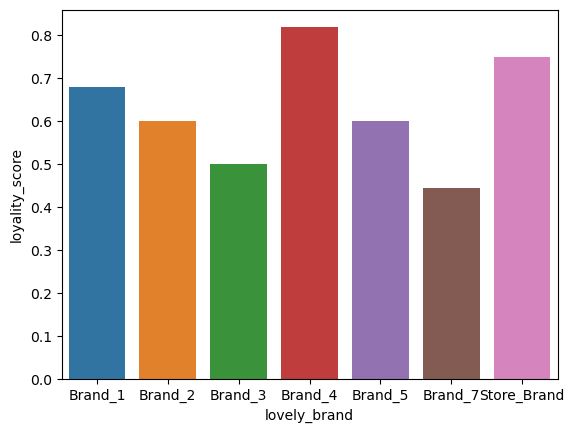

In [63]:
ax = sns.barplot(x='lovely_brand', y='loyality_score', data=brand_loyality)